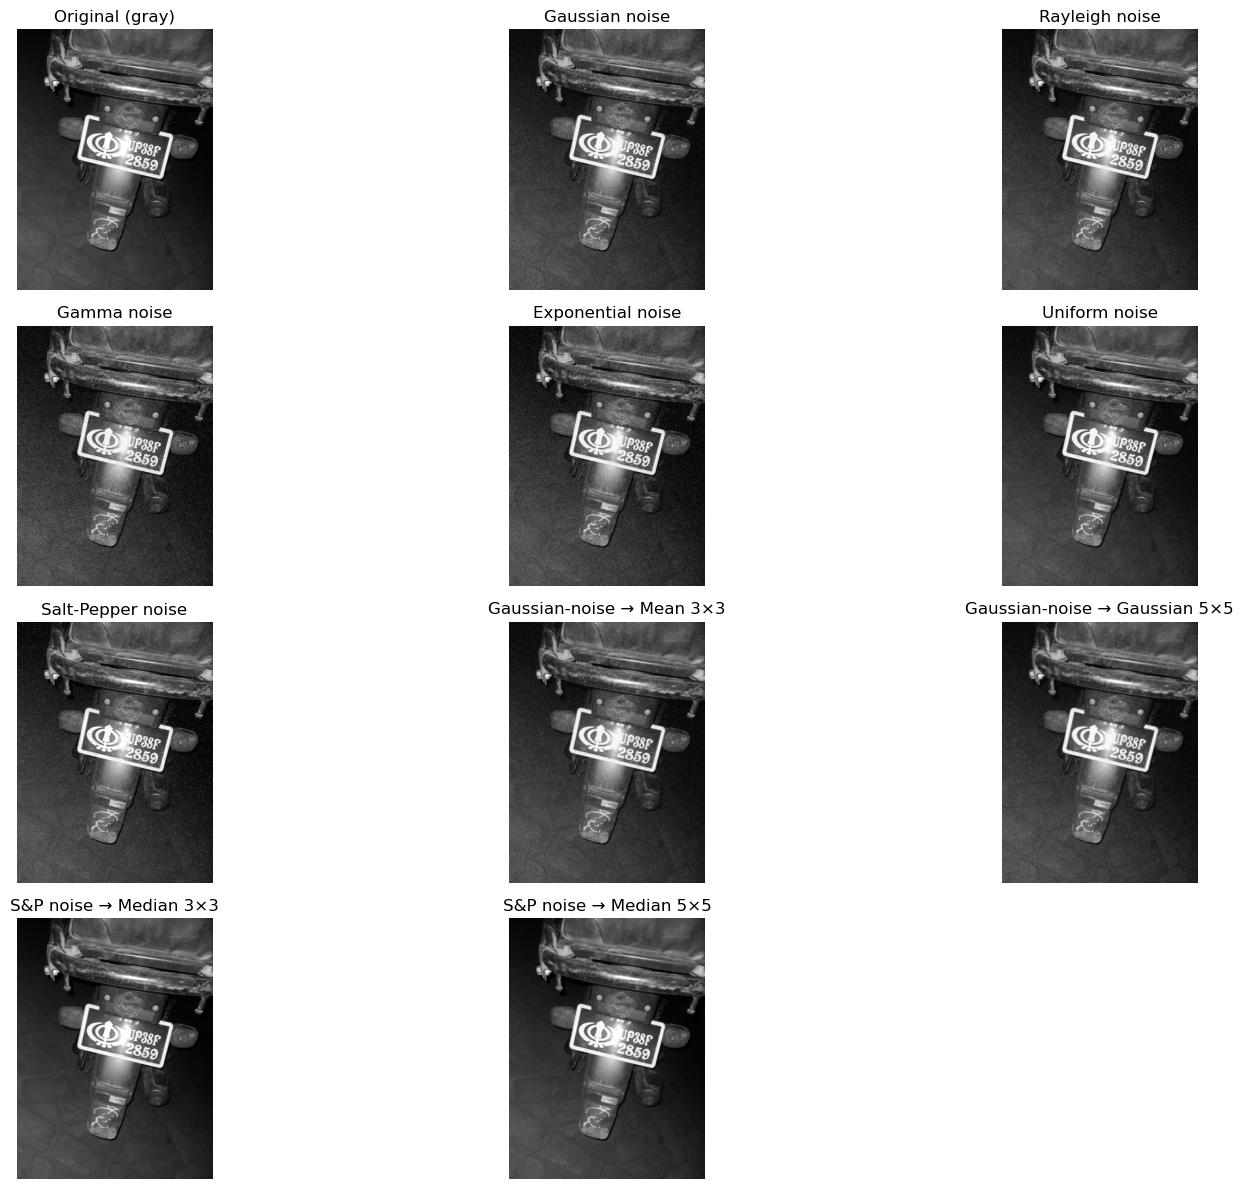

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"E:\Indian_Number_Plates\Sample_Images\Datacluster_number_plates (55).jpg"

def show_grid(titles, imgs, max_cols=4, figsize=(16,10)):
    n = len(imgs); cols = min(max_cols, n); rows = (n+cols-1)//cols
    plt.figure(figsize=figsize)
    for i,(t,img) in enumerate(zip(titles, imgs), 1):
        plt.subplot(rows, cols, i)
        cmap = 'gray' if img.ndim == 2 else None
        if img.ndim == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap=cmap)
        plt.title(t); plt.axis('off')
    plt.tight_layout(); plt.show()

def add_gaussian_noise(img, mean=0, sigma=15):
    noise = np.random.normal(mean, sigma, img.shape).astype(np.float32)
    out = img.astype(np.float32) + noise
    return np.clip(out, 0, 255).astype(np.uint8)

def add_rayleigh_noise(img, scale=20):
    r = np.random.rayleigh(scale, img.shape).astype(np.float32)
    out = img.astype(np.float32) + (r - r.mean())
    return np.clip(out, 0, 255).astype(np.uint8)

def add_gamma_noise(img, shape=2.0, scale=20.0):
    g = np.random.gamma(shape, scale, img.shape).astype(np.float32)
    out = img.astype(np.float32) + (g - g.mean())
    return np.clip(out, 0, 255).astype(np.uint8)

def add_exponential_noise(img, scale=25):
    e = np.random.exponential(scale, img.shape).astype(np.float32)
    out = img.astype(np.float32) + (e - e.mean())
    return np.clip(out, 0, 255).astype(np.uint8)

def add_uniform_noise(img, low=-25, high=25):
    u = np.random.uniform(low, high, img.shape).astype(np.float32)
    out = img.astype(np.float32) + u
    return np.clip(out, 0, 255).astype(np.uint8)

def add_impulse_noise(img, p=0.02, salt_vs_pepper=0.5):
    out = img.copy()
    N = img.size
    num_salt  = int(p * N * salt_vs_pepper)
    num_pepper= int(p * N * (1 - salt_vs_pepper))
    # Salt (set to 255)
    coords = (np.random.randint(0, img.shape[0], num_salt),
              np.random.randint(0, img.shape[1], num_salt))
    out[coords] = 255
    # Pepper (set to 0)
    coords = (np.random.randint(0, img.shape[0], num_pepper),
              np.random.randint(0, img.shape[1], num_pepper))
    out[coords] = 0
    return out

# Load grayscale
bgr = cv2.imread(IMG_PATH)
if bgr is None: raise FileNotFoundError(IMG_PATH)
h,w = bgr.shape[:2]
scale = min(1.0, 720.0/min(h,w))
bgr = cv2.resize(bgr, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Add noises
g_noisy  = add_gaussian_noise(gray, sigma=20)
r_noisy  = add_rayleigh_noise(gray, scale=25)
gm_noisy = add_gamma_noise(gray, shape=2.0, scale=20.0)
e_noisy  = add_exponential_noise(gray, scale=25)
u_noisy  = add_uniform_noise(gray, -25, 25)
sp_noisy = add_impulse_noise(gray, p=0.02, salt_vs_pepper=0.5)

# Quick restorations
mean3_g   = cv2.blur(g_noisy, (3,3))
gauss5_g  = cv2.GaussianBlur(g_noisy, (5,5), 1.0)

median3_sp= cv2.medianBlur(sp_noisy, 3)
median5_sp= cv2.medianBlur(sp_noisy, 5)

show_grid(
    ["Original (gray)",
     "Gaussian noise", "Rayleigh noise", "Gamma noise", "Exponential noise", "Uniform noise", "Salt-Pepper noise",
     "Gaussian-noise → Mean 3×3", "Gaussian-noise → Gaussian 5×5",
     "S&P noise → Median 3×3", "S&P noise → Median 5×5"],
    [gray,
     g_noisy, r_noisy, gm_noisy, e_noisy, u_noisy, sp_noisy,
     mean3_g, gauss5_g, median3_sp, median5_sp],
    max_cols=3, figsize=(16,12)
)
